## Hazel Baker-harvey
## Ting Lin
## Pratyusha Meka

# Introduction and Background

Media is deeply coupled with American culture; in 2017 alone almost 600 million tickets were sold at movie theaters in the US (http://www.the-numbers.com/market/). How is the media consumed affecting the public?

One theory presents media as a possibly negative influencer of culture. Dating back even to the 1950's, media has often been villainized as an inciter of violence. More recently in 1999, a Gallup poll found that 62% of the poulation believed violent media was a major cause of violent actions (http://www.gallup.com/poll/5626/blame-game-youth-media-violence.aspx). Often mass shootings are immeditaley tied to the culprit's media consumption habits; this happenned famously with Sandy Hook, and also with San Bernardino (https://www.thea-blast.org/top-stories/2016/01/14/is-violence-in-the-media-to-blame-for-mass-shootings/).
Society clearly concedes that movies should be content restricted, and age restricted as proved with our TV censor laws as well as movie rating system (https://en.wikipedia.org/wiki/Censorship_in_the_United_States https://en.wikipedia.org/wiki/Motion_Picture_Association_of_America_film_rating_system). Violent films are screened, and children are prevented from viewing them. Yet common sense tells us that with media being such a hallmark of our culture, media cannot create violent people. People can enjoy violent films without being incited to commit violence.

Though there is an immediate desire to blame media for violence, research actually often states the opposite. There was a study done by the National Bureau of Economic Research in which violent films were shown to reduce violent crime and drug consumption. Specifically “estimates suggest that in the short-run violent movies deter almost 1,000 assaults on an average weekend” (http://www.nber.org/papers/w13718). This study claims that the violent nature of the films serves as an outlet for violent energy, thus leading to less committed acts. Our team wonders if there is an effect of violent media in the long run. We also wonder about the validity of their claim that the violent content itself is what influences the deterance of violent acts in the short run?

Other researchers disagree that violent films do promote aggression (http://www.nytimes.com/2008/01/07/business/media/07violence.html). This study argues that exposure to violence increases over all agressive behavior. This article however fails to answer to the fact that there is a decrease in violent crime in the short run in conjunction with violent films.

Another study, asnwering to the decrease in violent crime, says it is not the content of the films that cause that reduced crime. The paper asserts that it is not a result of genre, but a result of occupying young men (those most likely to commit violent crime). This article also offers that specific actors could contribute to crime rate as well. (https://eml.berkeley.edu/~sdellavi/wp/moviescrimeQJEProofs2009.pdf).

There is clearly a lot of controversy and differing opinions surrounding the topic of violent media's effects on the public. Does violent media have long term effects? Will the effect of violent media be seen through a larger time scale? Is violent film the only genre which will influence crime rate? Do other genres that attract young male audiences effect crime similarly to violent films?

We hope to combine these questions in one project looking at genre specifically and enlarging the time frame. This will give us a better, more complete, picture on violent crime and its interaction with media.
Our question stands: How does the number of each genre of film produced per year affect crime rate in San Diego? Is there a large scale, large time frame, influence deriving from the type of media consumed?

# Data Description

We originally started with three data sets, two relating to crime and one relating to movies.

Our movie data set was taken from Kaggle and was already pre scraped for us off of IMDB. This data set contained movies dating back 100 years, and each entry had information about title, main actor, genre, director, budget, year released, rating, and more. The data set can be found at : https://www.kaggle.com/deepmatrix/imdb-5000-movie-dataset. In total the data contains 5044 entries. We hope to use this data to make new dataframes that isolate movies by year released and by genre.

When we load this data we call it "moviedata" and the file is called "movie_metadata.csv."

We then had two data sets on crime, one national and one local to the San Diego region. Our local data set spanned from 2008 to 2012 and had detailed information on time, location, and type of each crime in the San Diego region. This data can be found at : http://data.sandiegodata.org/dataset/clarinova_com-crime-incidents-casnd-7ba4-extract and has 797979 entries. This data will be used initally in our analysis just of the years 2008 - 2012 to see if there are local large scale effects to media consumption.

When we load this data we call it "incidents" and the file is called "incidents-5y.csv."

Our national dataset has data dating back to 1960 which reported number of crime by types (murder, robbery etc) corresponding to year. The national data set can be found at : https://data.world/government/uniform-crime-reports and had 53 entries. This data set will be used after our preliminary tests to enlarge our timescale and frame.

When we load this data we call it "reportNational" and the file is called "CrimeReports.csv."

In [1]:
#Import all the packages we needed
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import patsy
import statsmodels.api as sm
from scipy.stats import chi2_contingency
from sklearn import datasets

In [2]:
#Here we load the data
moviedata = pd.read_csv("movie_metadata.csv") 
incidents = pd.read_csv("incidents-5y.csv")
reportNational = pd.read_csv("Uniform crime reports.csv")

# Data Cleaning/Pre-processing

We are only interested in certain parts of the dataframe so we're going to select the year, the title of the movie, the genre, the keywords, the country and the rating of the movie. We remove any missing data points. And then lastly we exclude any movies not released in the US. We chose to do this because we assume that only movie played regularly in the US will affect US crime rates.

In [3]:
#Data Clean for the moviedata 
#Select: 
#       title_year, movie_title, genres, plot_keywords, country, content_rating
#Methods: 
#        drop all the NAN and extract "USA" movies

movie1 = moviedata[['title_year','movie_title','genres','plot_keywords','country','content_rating']]
movie2 = movie1.dropna()
movieUSA = movie2[movie2['country'] == "USA"]

USASort = movieUSA.sort_values(['title_year'], ascending = True)

At the end of the above box, we sort the movies by year released. We will only be focusing on movies released from 2008 to 2012 because those dated correspond to our crime data set. In the next box we exclude any movie not released in the time period 200-2012; having the data sorted made this step much easier.

In [4]:
#sort values in ascending year from 2008 to 2012
Myear0812 = USASort[(USASort['title_year'] >= 2008) & (USASort['title_year'] <= 2012)].reset_index(drop=True)

Because 2008-2012 is a fairly small time frame, we assume there will be no large differences in total number of movies released each year. Below we visualize our data to check this prediction.

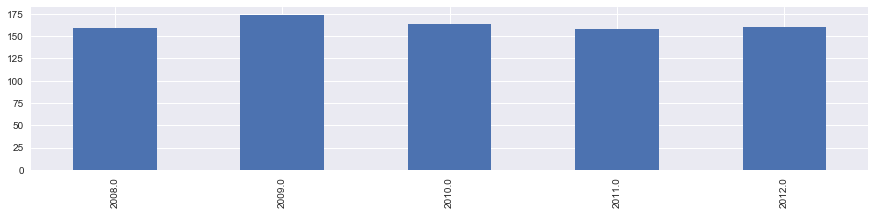

In [5]:
#Movie production in each year from 2008-2012 approximate the same
plt.figure(figsize = (15,3))
year = Myear0812.loc[:, 'title_year'].value_counts().sort_index()

year.plot.bar()

Our assumption was correct, each year from 2008 to 2012 has approximatley the same number of movies released.

Now we want to split our main movie dataframe up by year, to further analyze each year in our time frame.

In [6]:
#Sort data into df by year
Mgy08 = USASort[USASort['title_year'] == 2008.0]
Mgy09 = USASort[USASort['title_year'] == 2009.0]
Mgy10 = USASort[USASort['title_year'] == 2010.0]
Mgy11 = USASort[USASort['title_year'] == 2011.0]
Mgy12 = USASort[USASort['title_year'] == 2012.0]

The genres that we have identified are : action, animation, comedy, documentary ... etc Below we initialize a series containing all the genres. This will help us if we need a list of genres later, and will also allow us to know how many movies of each genre was produced in each year. 

In [7]:
#Set Variable for all movie genres 
ser_genres = ['Action','Animation','Comedy','Documentary','Family','Horror','Musical','Romance', 'Sport','War','Adventure','Biography','Crime','Drama','Fantasy','History','Music','Mystery','Sci-Fi','Thriller','Western']


Below we initialize data frames that will eventually be populated with the counts of each genre by year.

In [8]:
#Creating a new data frame for 2008 to 2012
df08 = pd.DataFrame(ser_genres)
df08['n'] = 0
df08.columns =['genres','n']
df09 = pd.DataFrame(ser_genres)
df09['n'] = 0
df09.columns =['genres','n']
df10 = pd.DataFrame(ser_genres)
df10['n'] = 0
df10.columns =['genres','n']
df11 = pd.DataFrame(ser_genres)
df11['n'] = 0
df11.columns =['genres','n']
df12 = pd.DataFrame(ser_genres)
df12['n'] = 0
df12.columns =['genres','n']

Because we will need to repeat the process of searching our movie dataset for genre name, and then populating the dataframes with the counts, we made three methods.

In [9]:
#Function: get a substring from the Series and return number x in series, y in string
def countString(x, y):
    num = x.str.contains(y).value_counts()      
    if num[False] == len(x):
        return 0
    else:
        num = num[True]
        return num

In [10]:
#Function: get data and store in df_temp
def fillDataFramesMov(database,df_temp):
    for i in range (0,len(df_temp)):
        n = countString(database['genres'],df_temp.ix[i,'genres'])
        df_temp.ix[i,'n'] = n 
    return df_temp

In [11]:
def fillDataFramesCrime(database,df_temp):
    for i in range (0,len(df_temp)):
        n = countString(database['type'],df_temp.ix[i,'crime'])
        df_temp.ix[i,'n'] = n 
    return df_temp

With out methods, we populate each movie dataset with the counts of movie genres by year.

In [12]:
#Assign frequency to the movie genres in 2008
df08 = fillDataFramesMov(Mgy08,df08)

In [13]:
#Assign frequency to the movie genres in 2009
df09 = fillDataFramesMov(Mgy09,df09)

In [14]:
#Assign frequency to the movie genres in 2010
df10 = fillDataFramesMov(Mgy10,df10)

In [15]:
#Assign frequency to the movie genres in 2011
df11 = fillDataFramesMov(Mgy11,df11)

In [16]:
#Assign frequency to the movie genres in 2012
df12 = fillDataFramesMov(Mgy12,df12)

With our movie data cleaned and organized, we now move onto our crime data. We drop data points that are irrelevant to our experiement, only keeping year, the kind of crime, and the location of the crime. We then focus the neighborhood on those most proximal to theaters, and therefore we assume most influenced by movies. Because the data set is so large (797979 entries), we randomly sample 1000 data points. This will provide a representative sample without being overwhelming to work with.

In [17]:
#Clean for the incidents data
#Select: year, is_night, type, city, nbrhood, asr_zone, lat, lon
#Method: assuming incidents happened in commercial area (asr_zone = 6.0)
#        we want population close to the theather(commmerical) area 
#        drop all NAN.
#        taking 1000 samples randomly

incidents1 = incidents[['year', 'is_night', 'type', 'city', 'nbrhood', 'asr_zone', 'lat', 'lon']]
incidentsN = incidents1.dropna()

commercial = incidentsN[incidentsN['asr_zone'] == 6]

c = commercial.sample(n=1000).reset_index(drop=True)


We want to know which crimes occur more often than others. We don't think that each type of crime occurs as often as others. Let's visualize this in the form of a bar graph.

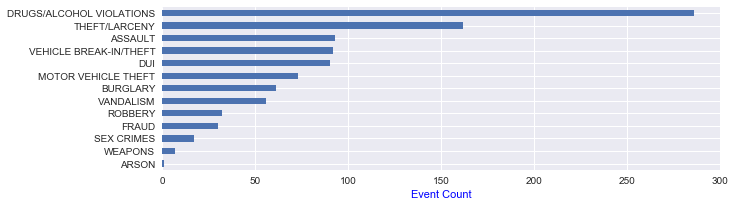

In [18]:
#Categorization of crime from our 1000 samples
plt.figure(figsize = (10,3))
x = c.loc[:, 'type'].value_counts()  
x.plot.barh().invert_yaxis()

plt.xlabel('Event Count', color = "Blue")

f1 = plt.gcf()

We see that drug and alcohol violations are the most popular in San Diego but the number of theft/larceny crimes are much higher than the number of sex crimes and crimes regarding weapons. This could be not representative of the actual data, but we have confidence that a sample of 1000 is robust to chance effects.

Below we will repeat similar steps to clean our crime data as performed for our movie data. We isolate crime by year within our time frame of 2008-2012. We create a series describing type of crime. We then initialize and populate our datasets that contain counts of kind of crime by year.

In [19]:
#Get each title year in crime
c08 = c[c['year'] == 2008]
c09 = c[c['year'] == 2009]
c10 = c[c['year'] == 2010]
c11 = c[c['year'] == 2011]
c12 = c[c['year'] == 2012]

In [20]:
#Crime by category
ser_crimes = ['DRUGS','LARCENY','VEHICLE','MOTOR','ASSAULT','BURGLARY','VANDALISM','DUI','ROBBERY','FRAUD','SEX','WEAPONS','ARSON','HOMICIDE']


In [21]:
#Creating a new data frame for 2008 to 2012
dfc08 = pd.DataFrame(ser_crimes)
dfc08['n'] = 0
dfc08.columns =['crime','n']
dfc09 = pd.DataFrame(ser_crimes)
dfc09['n'] = 0
dfc09.columns =['crime','n']
dfc10 = pd.DataFrame(ser_crimes)
dfc10['n'] = 0
dfc10.columns =['crime','n']
dfc11 = pd.DataFrame(ser_crimes)
dfc11['n'] = 0
dfc11.columns =['crime','n']
dfc12 = pd.DataFrame(ser_crimes)
dfc12['n'] = 0
dfc12.columns =['crime','n']

In [22]:
#Assign frequency to the movie genres in 2008
dfc08 = fillDataFramesCrime(c08,dfc08)

In [23]:
#Assign frequency to the movie genres in 2009
dfc09 = fillDataFramesCrime(c09,dfc09)

In [24]:
#Assign frequency to the movie genres in 2010
dfc10 = fillDataFramesCrime(c10,dfc10)

In [25]:
#Assign frequency to the movie genres in 2011
dfc11 = fillDataFramesCrime(c11,dfc11)

In [26]:
#Assign frequency to the movie genres in 2012
dfc12 = fillDataFramesCrime(c12,dfc12)

We now have two sets of five data sets. Movie genres by year are described by the data sets df08-df12. Crime type by year is described in the data sets dfc08-dfc12.

To be better able to work with our datasets, we combined the two sets of five to make one master dataset for crime, and one for genre. Below each chunk of code is the displayed new dataset.

In [27]:
#Merge all Genres by Year
df08.columns = ['Genres','2008']
df09.columns = ['Genres','2009']
df10.columns = ['Genres','2010']
df11.columns = ['Genres','2011']
df12.columns = ['Genres','2012']

genresY = df08.merge(df09, on='Genres').merge(df10, on='Genres').merge(df11, on='Genres').merge(df12, on='Genres')
genresY = pd.pivot_table(genresY, index = 'Genres')
genresY

,2008,2009,2010,2011,2012
Genres,,,,,
Action,33,33,41,40,39
Adventure,28,31,29,32,30
Animation,7,11,9,12,9
Biography,7,4,7,5,8
Comedy,68,72,71,67,70
Crime,21,28,24,18,26
Documentary,6,3,4,6,4
Drama,79,84,76,69,67
Family,21,21,28,21,16


In [28]:
#Merge all Crime by Year
dfc08.columns = ['Crime','2008']
dfc09.columns = ['Crime','2009']
dfc10.columns = ['Crime','2010']
dfc11.columns = ['Crime','2011']
dfc12.columns = ['Crime','2012']

crimeY = dfc08.merge(dfc09, on='Crime').merge(dfc10, on='Crime').merge(dfc11, on='Crime').merge(dfc12, on='Crime')

#removes rows and columns with only 0s
#used later for chi-squared test
crime_no_zero = crimeY[:12]
crime_no_zero = crime_no_zero.drop('2012', 1)
crime_no_zero = pd.pivot_table(crime_no_zero, index = "Crime")
#crime_no_zero

crime_pivot = pd.pivot_table(crimeY, index = "Crime")
crime_pivot

,2008,2009,2010,2011,2012
Crime,,,,,
ARSON,0,0,1,0,0
ASSAULT,21,22,9,19,22
BURGLARY,14,15,7,16,9
DRUGS,62,59,75,63,27
DUI,19,17,22,15,17
FRAUD,7,2,8,6,7
HOMICIDE,0,0,0,0,0
LARCENY,29,22,36,39,36
MOTOR,25,19,8,8,13


We also wanted the same data set, but rotated for easier graphing. Below is the code that rotates the data sets, as well as the printed new datasets.

In [29]:
#Creates data frame with columns being genres
genByGen = genresY.transpose()
genByGen.columns = ser_genres
#genByGen = genByGen.drop(genByGen.index[[0]])
genByGen.index.name = 'Year'
genByGen

,Action,Animation,Comedy,Documentary,Family,Horror,Musical,Romance,Sport,War,...,Biography,Crime,Drama,Fantasy,History,Music,Mystery,Sci-Fi,Thriller,Western
Year,,,,,,,,,,,,,,,,,,,,,
2008,33,28,7,7,68,21,6,79,21,20,...,17,13,5,13,43,20,9,37,7,1
2009,33,31,11,4,72,28,3,84,21,27,...,22,12,3,20,45,28,4,48,3,0
2010,41,29,9,7,71,24,4,76,28,27,...,16,7,3,11,51,13,5,45,2,3
2011,40,32,12,5,67,18,6,69,21,18,...,17,8,4,18,27,23,6,41,2,2
2012,39,30,9,8,70,26,4,67,16,28,...,22,10,4,12,33,19,5,45,3,2


In [30]:
#Creates data frame with columns being crime genres
criByCri = crimeY.transpose()
criByCri.columns = ser_crimes
criByCri = criByCri.drop(criByCri.index[[0]])
criByCri.index.name = 'Year'
criByCri

,DRUGS,LARCENY,VEHICLE,MOTOR,ASSAULT,BURGLARY,VANDALISM,DUI,ROBBERY,FRAUD,SEX,WEAPONS,ARSON,HOMICIDE
Year,,,,,,,,,,,,,,
2008,62,29,54,25,21,14,12,19,10,7,4,3,0,0
2009,59,22,41,19,22,15,11,17,7,2,0,1,0,0
2010,75,36,21,8,9,7,13,22,7,8,3,1,1,0
2011,63,39,18,8,19,16,12,15,3,6,5,2,0,0
2012,27,36,31,13,22,9,8,17,5,7,5,0,0,0


# Data Visualization

Data visualization is key, and is vital to communicating scientific results to the public. We use multiple different methods of visualizations below. We mainly focus on bar graphs because our data is comparing multipe groups and also tracking changes over time. All of our graphs have color legends to explain what each genre or crime type is presented as. 

These first graphs show each inividual year as a singualr bar, then each genre is colored to demonstrate what proportion of the year's production it represents.

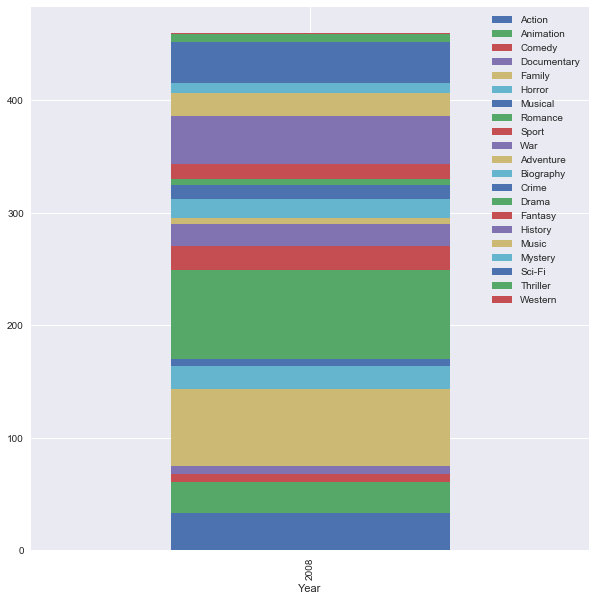

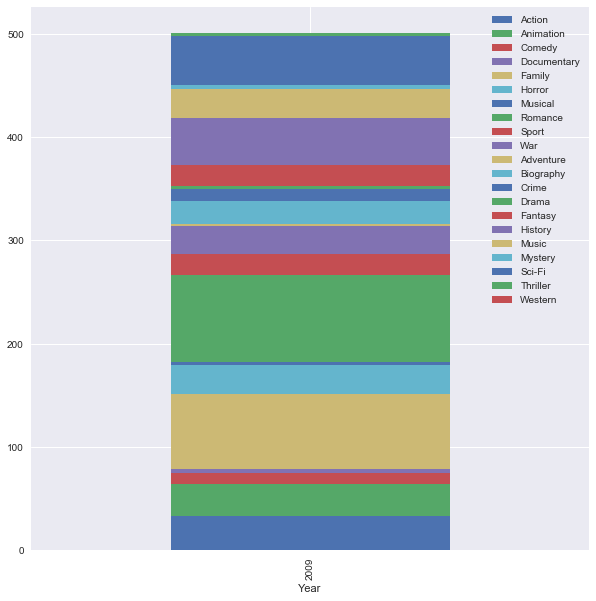

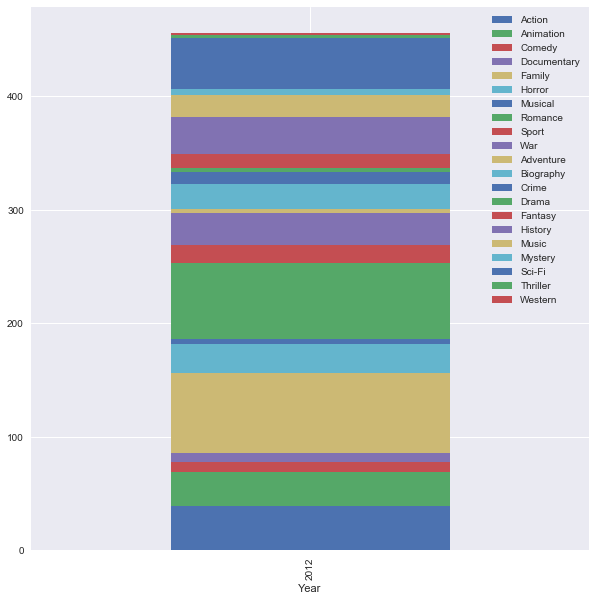

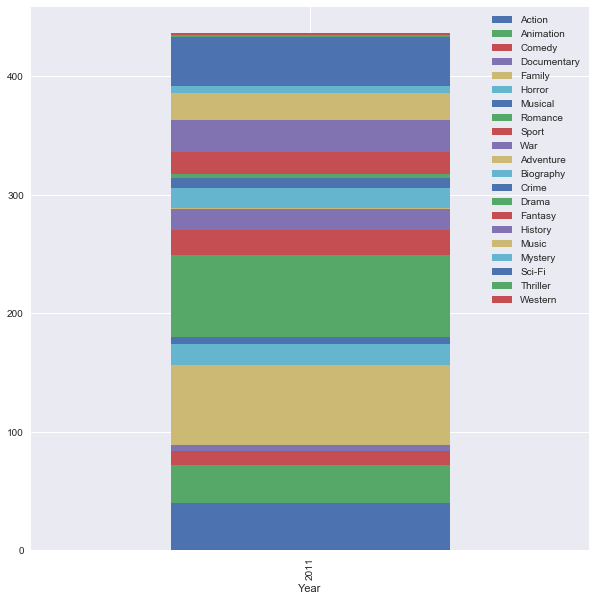

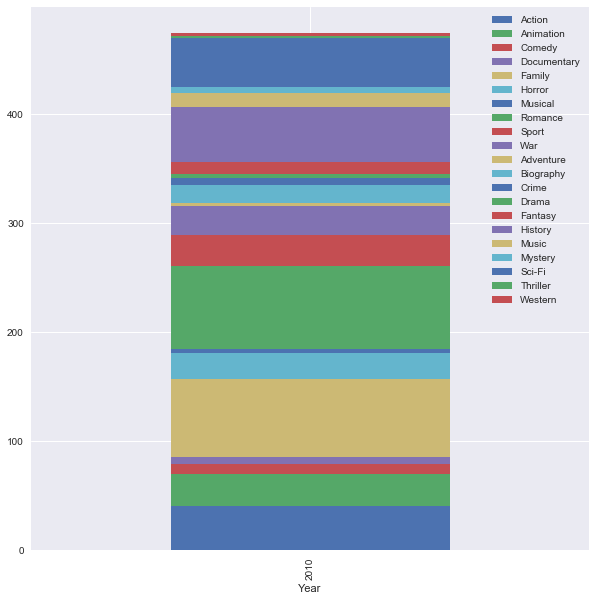

In [31]:
#plot each year with proportional genres
g1 =  genByGen.groupby(['Action','Animation','Comedy','Documentary','Family','Horror','Musical','Romance', 'Sport','War','Adventure','Biography','Crime','Drama',
                  'Fantasy','History','Music','Mystery','Sci-Fi','Thriller','Western'])

fig = g1.plot(kind='bar',figsize = (10,10),stacked=True,sharex =True)


The next boxes demonstrate our ambition to come up with a line of regression that could predict both number of crime type and number of movies within a genre by year of production. However we decided this was not useful because the number of any kind of movie or any kind of crime did not change much year to year.

In [32]:
#returns genre based on index
def getGenre(num):
    genrez = ['Action','Animation','Comedy','Documentary','Family','Horror','Musical','Romance', 'Sport','War','Adventure','Biography','Crime','Drama',
                  'Fantasy','History','Music','Mystery','Sci-Fi','Thriller','Western']
    return genrez[num]

In [33]:
#will make lines
linesMov = pd.DataFrame(columns = ['Genres','a','b'])
linesMov['Genres'] = ['Action','Animation','Comedy','Documentary','Family','Horror','Musical','Romance', 'Sport','War','Adventure','Biography','Crime','Drama',
                  'Fantasy','History','Music','Mystery','Sci-Fi','Thriller','Western']

In [34]:
#x = np.array(genByGen[tempGen])
#y = np.array(genByGen.index)
#for i in range (0,(len(genByGen.columns))-1):
#        tempGen = getGenre(i)
#        a,b = np.polyfit(x,y,1)
#        linesMov.ix[i,'a'] = a
#        linesMov.ix[i,'b'] = b

In the next plots we have a combination of bar graph and histogram. This graph shows the number of movies produced in a genre, but for each genre we plot data from 2008-2012. This graph helps visualize the unequal distribution of genre type (more dramas than sport films). But the graph also shows the relative repetition of genres by year.

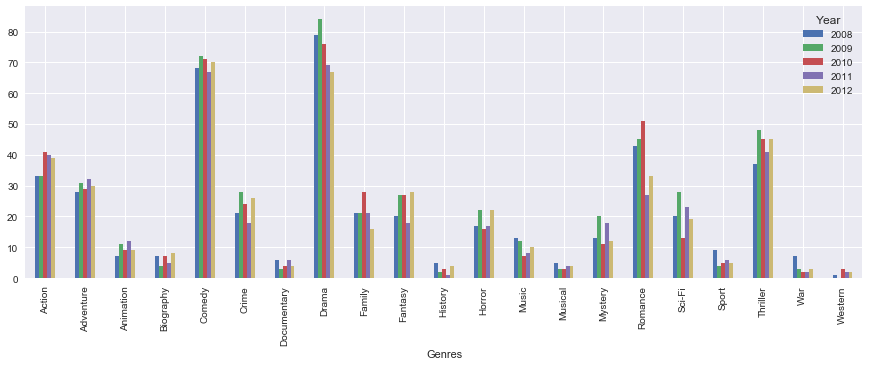

In [35]:
#Plot line graph for each year x = 'genres', y = 'amounts'
#each year is identical
genresY.plot.bar(figsize = (15,5))

Next we plot the same data, but as a function of year with each bar representing a genre. 

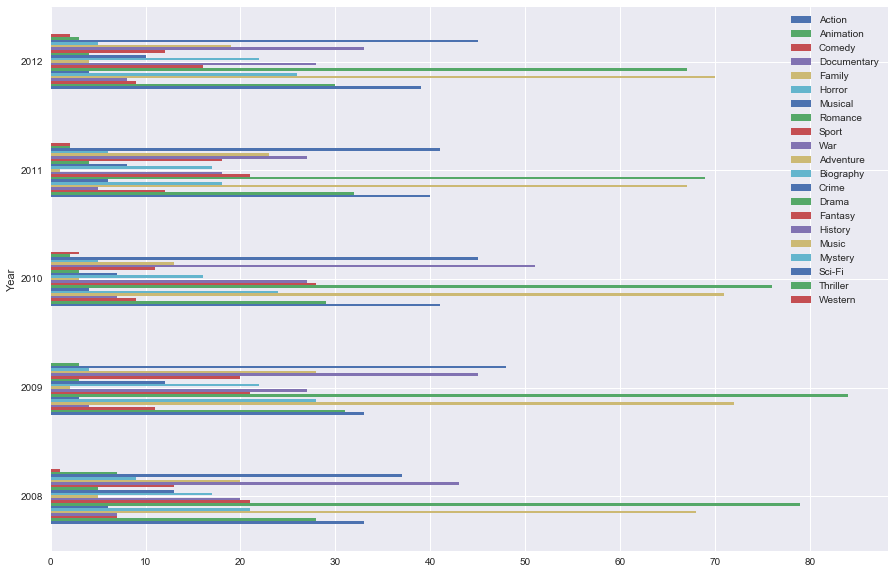

In [36]:
#Plot line graph for each year x = 'genres', y = 'amounts'
#each year is identical
genByGen.plot.barh(figsize = (15,10));plt.legend(loc='best')

#genresY.plot.line(figsize = (15,5))
#genresY['Action'].plot(kind='line')

We now repeat the above graphs, but with our crime data. The first graph shows number of each type of crime. Each bar represents a specfiic year during 2008-2012. Again we can see that relative number of crimes are unchanging year to year, but certain crimes are always committed more than other (more drug use than arson). 

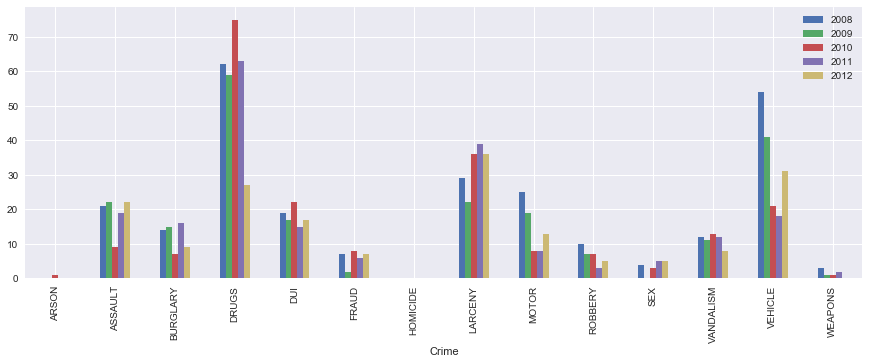

In [37]:
#Plot line graph for each year x = 'crime type', y = 'amounts'
#each year is identical
crime_pivot.plot.bar(figsize = (15,5))

The graph below shows number of crime by year, with each bar representing a particular type of crime.

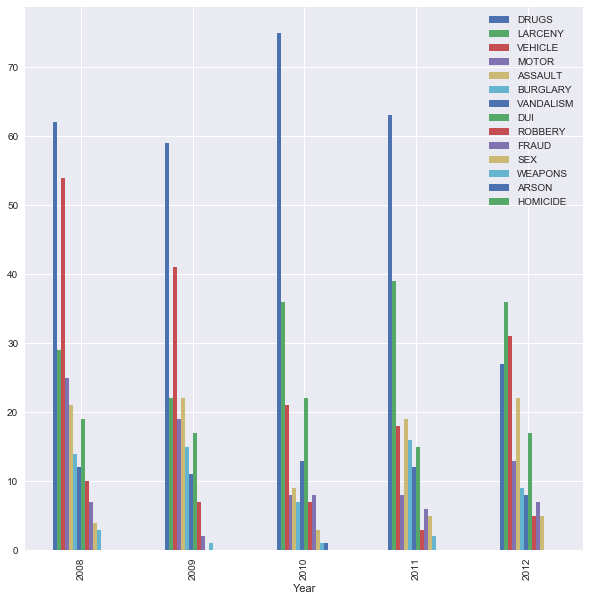

In [38]:
#Plot line graph for each year x = 'crimes', y = 'amounts'
#each year is identical
criByCri.plot.bar(figsize = (10,10));plt.legend(loc='best')


To further emphasize our point that there is not much change from year to year, we have plotted each year in another program. By using seaborn we made graphs that are more pleasing to the eye. Unfortunately, these graphs repeat our above findings, that some crimes routinely occur more than others. But, there is no significant variance in crime from year to year.

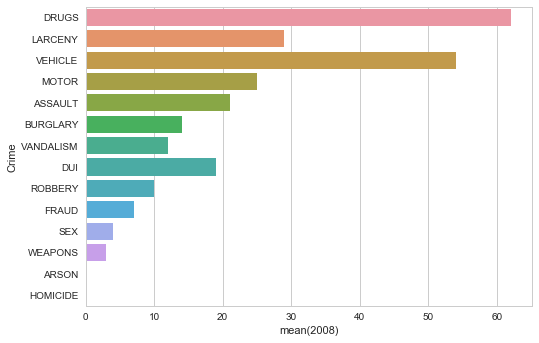

In [39]:
#crime 08
sns.set(style="whitegrid", color_codes=True)
sns.barplot(x='2008', y='Crime', data=crimeY, orient = "h");

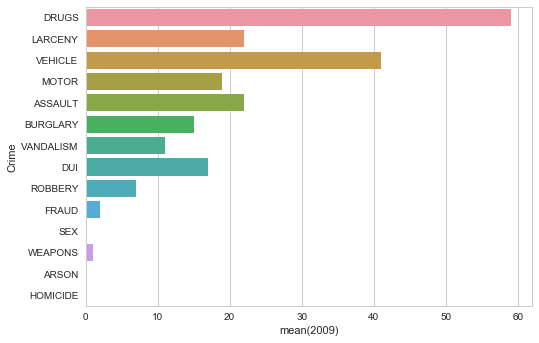

In [40]:
#crime 09
sns.set(style="whitegrid", color_codes=True)
sns.barplot(x='2009', y='Crime', data=crimeY, orient = "h");

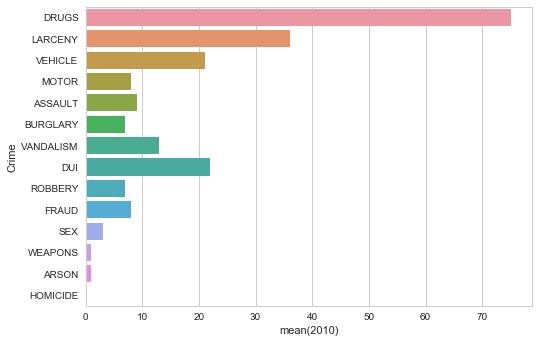

In [41]:
#crime 10
sns.set(style="whitegrid", color_codes=True)
sns.barplot(x='2010', y='Crime', data=crimeY, orient = "h");

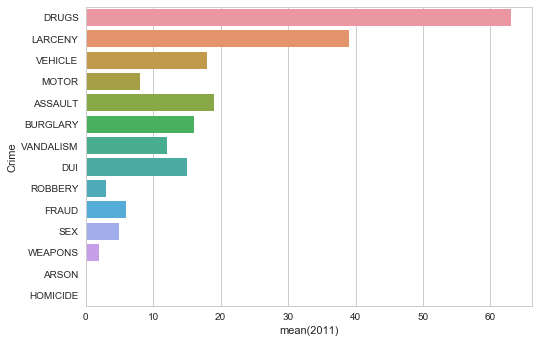

In [42]:
#crime 11
sns.set(style="whitegrid", color_codes=True)
sns.barplot(x='2011', y='Crime', data=crimeY, orient = "h");

After visualizing our data and performing a sniff test, we think it is clear that there will be no significant result comparing genres of movies to types of crime. Because both the genre distribution and crime distribution do not change year to year, we decided to investigate another facet of our data set...

We went back to our original data set of movies, and again selected on movies in the US. But this time we kept all movies from 1960-2012. We decided to to this so we can compare it to our larger dataset of crimes going back to 1960. We hope by expanding our timeframe larger than 5 years we will see more patters.

In [43]:
#Take year, genres, country from USASort and select movies from 1960-2012
m1 = USASort[['title_year', 'genres', 'country']]
m1 = m1[(m1.title_year > 1959) & (m1.title_year < 2013)]


We also suspect that focusing on all genres is too big of a focus. Because our experiement is based off of previous work focusing on violent films and violent crimes, we decide to follow in their footsteps. We isolate only movies that probably have violent themes from the Crime, War, Horror, and Action genres.

In [44]:
#Get Crime, War, Horror, Action movies from Genres
c = 'Crime'
w = 'War'
h = 'Horror'
a = 'Action'

for index, row in m1.iterrows():
    if row['genres'].find(c or w or h or a) == -1 :
        m1.drop(index, inplace=True)

We then group together and count all the films we suspect as having violent content, meaning have a possibly violent genre.

In [45]:
#Group and count genres which contains keyword 'crime','war','horror','action' in response to the year
m1 = m1[['title_year', 'genres']]
m1 = m1.groupby('title_year').count()

We struggled to make a method to count the number movies in violent genres by year, so we manually counted and placed results in an array representing number of war, crime, action, or horror movie by year.

In [46]:
#Creating a vector that represents the genres in each year
vector = np.array([0, 1,1,1,0,0,1,2, 0,1,0,4,2,2,1,0,1, 0,0,2,1,3,1,3,3,2,2,5,4,4,5,9,8,8,16,17,23,25,20,23,26,41,35,31,22,24,21,27,22,29,24,19,
27])

Next we prune our dataset on national crime back to 1960 for relevent data. We only care about violent crime, so for the new data set we only care about the year, and total number of violent crime.

In [47]:
#Get year, violent crime total from national report
selection = reportNational[['Year', 'Violent crime total']]
reportNational_pivot = pd.pivot_table(reportNational, index = "Year")
reportNational

,Year,Population,Violent crime total,Murder and nonnegligent Manslaughter,Forcible rape,Robbery,Aggravated assault,Property crime total,Burglary,Larceny-theft,Motor vehicle theft
0,1960,179323175,288460,9110,17190,107840,154320,3095700,912100,1855400,328200
1,1961,182992000,289390,8740,17220,106670,156760,3198600,949600,1913000,336000
2,1962,185771000,301510,8530,17550,110860,164570,3450700,994300,2089600,366800
3,1963,188483000,316970,8640,17650,116470,174210,3792500,1086400,2297800,408300
4,1964,191141000,364220,9360,21420,130390,203050,4200400,1213200,2514400,472800
5,1965,193526000,387390,9960,23410,138690,215330,4352000,1282500,2572600,496900
6,1966,195576000,430180,11040,25820,157990,235330,4793300,1410100,2822000,561200
7,1967,197457000,499930,12240,27620,202910,257160,5403500,1632100,3111600,659800
8,1968,199399000,595010,13800,31670,262840,286700,6125200,1858900,3482700,783600
9,1969,201385000,661870,14760,37170,298850,311090,6749000,1981900,3888600,878500


We will now construct a dataframe that goes back to 1960 from 2012, it contains the total number of violent crime by year as well as total number of movies with possible violent content (action, horror, crime, war).

In [48]:
#Creating a final report that contains year, violent crime, movies(contains the violent key words) nationally
col = ['year', 'violent crime', 'movies']
final_report = pd.DataFrame(columns = col)
final_report['year'] = selection['Year']
final_report['violent crime'] = selection['Violent crime total']
final_report['movies'] = vector
final_report

,year,violent crime,movies
0,1960,288460,0
1,1961,289390,1
2,1962,301510,1
3,1963,316970,1
4,1964,364220,0
5,1965,387390,0
6,1966,430180,1
7,1967,499930,2
8,1968,595010,0
9,1969,661870,1


Below we visualize the data as a scatter plot. Each data point is a year as represented by the total number of violent crimes and total number of possibly violent movies.

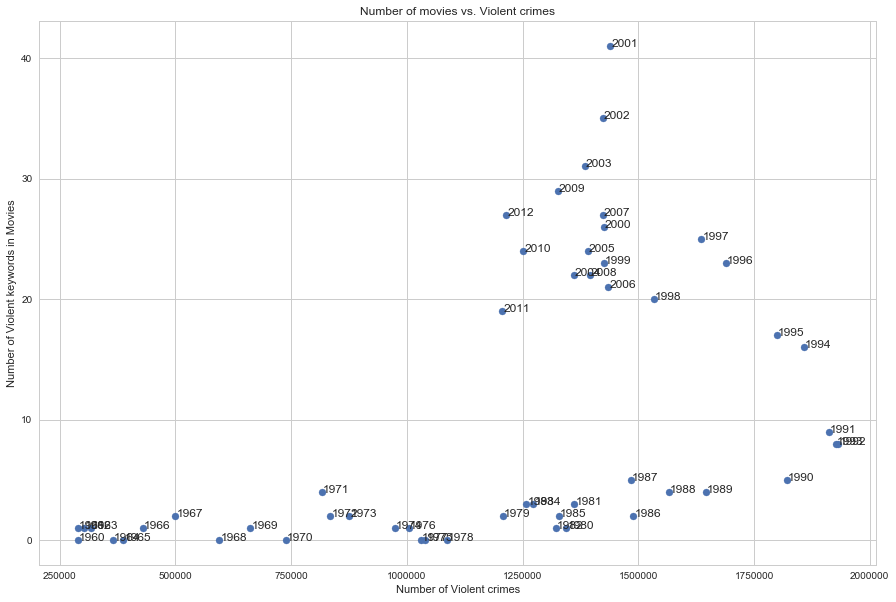

In [49]:
#Plot the result
plt.figure(figsize = (15, 10))
plt.scatter(final_report['violent crime'], final_report['movies'])
plt.title("Number of movies vs. Violent crimes")
for label, movie_count, crime_count in zip(final_report['year'], final_report['movies'], final_report['violent crime']):
    plt.annotate(label, xy = (crime_count, movie_count), xytext = (1, -1), textcoords = 'offset points')
    
plt.xlabel('Number of Violent crimes')
plt.ylabel('Number of Violent keywords in Movies')

# Data Analysis & Results

We want to see if on a national scale there is an association between the year and the number of each type of crime committed. We will run a chi squared test. This will allow us to later compare it to the results of a chi squared test between year and the number of each type of crime committed in San Diego.

In [50]:
valueN, pN, dfN, expectedN = chi2_contingency(observed= reportNational_pivot)

Nationally there seems to be an association between year and type of crime committed. However, our time frame is much larger nationally than our time frame for San Diego. So we will see if there is still an association on a national level between the years 2008 and 2012. 

In [51]:
part_of_national = reportNational[48:53]
valuepN, pPN, dfPN, expectedPN= chi2_contingency(observed= part_of_national)

We want to check if there is any relation between year and the number of movies released in each genre. We will run a chi-squared test to see if there is an association. We don't expect there to be an association, but we will run the test to be sure.

In [52]:
valueG, pG, dfG, expectedG = chi2_contingency(observed= genresY)
print(pG)

0.984870188048


Given the high p-value, we can conclude that there is no association between the two variables. For consistency we will run another chi-squared test on year and the number of each type of crime.

In [53]:
valueC, pC, dfC, expectedC = chi2_contingency(observed = crime_no_zero )
print(pC)

0.000706387719749


The p-value here is high as well meaning that there is no association between the two variables. Since we don't have an association between the types of crimes and year and the types of movies and year, we will now focus our search on a more narrow scope. We will see if there is an association between the number of violent crimes committed in a year nationally, and the number of American movies released in a year under the genres Action, Crime, War and Horror. We created a scatter plot above and the relationship does not appear to be entirely linear but we will run a regression test to be sure. In this case our null hypothesis is that there is no significant relationship in the number of violent crimes committed in a year and the number of movies released in those specific genres. 

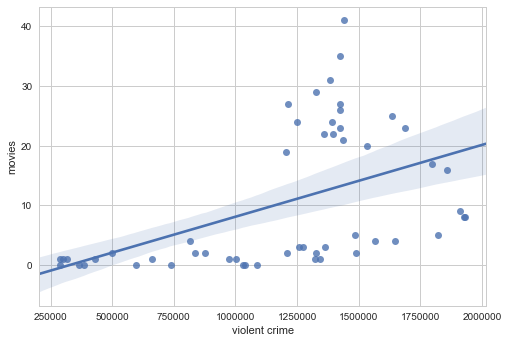

In [54]:
a1, b1 = np.polyfit(final_report['violent crime'], final_report['movies'], 1)
sns.regplot(final_report['violent crime'], final_report['movies'])

In [55]:
#sm.OLS()
result = sm.OLS(final_report['violent crime'], final_report['movies']).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:          violent crime   R-squared:                       0.567
Model:                            OLS   Adj. R-squared:                  0.559
Method:                 Least Squares   F-statistic:                     68.13
Date:                Tue, 13 Jun 2017   Prob (F-statistic):           5.06e-11
Time:                        15:32:37   Log-Likelihood:                -798.18
No. Observations:                  53   AIC:                             1598.
Df Residuals:                      52   BIC:                             1600.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
movies      6.196e+04   7506.389      8.254      0.0

The results shown above tell us that R-squared is 0.567 which gives us an R value of 0.752 . Since the p-value is much smaller than 0.05, we can reject our null hypothesis. We find that there is a relationship between the number of violent crimes committed in a year and the number of Action, Horror, War and Crime related movies released. It is important to note that initially the conditions for inference weren't completely met since the relationship doesn't look linear. 

# Conclusions and Discussion

While according to simple statistics it appears we have found an effect, this may be more an artifact than a real discovery.

We demonstrated with this project our ability to clean large data sets, deciding which variables are relevant to our question. But it is also important to remember with each assumption, we may have jeopardized our results! We chose to only look at American movies, which could make us oblivious to results informed by foreign films. We also persribed 'War', 'Crime', 'Horror', and 'Action' as violent films. This is not always true, nor exclusive. We feel it was a good estimate of content, but we could have also analyzed keywords to better understand content. 

We also had a very large time frame. We first focused on 2008-2012 in which we saw no effects. But then we zoomed out to focus on 1960-2012. While at this stage we could see change, this time frame is so large that the change is more likely due to outside factors and not movies. Also movies are not played continuously for a year, the release year can be not representative of when the film was shown. Also movies only last an hour, so perhaps crime should also be analyzed in terms of hour, not year.

Ignoring all the possible confounds, we conclude that there is an effect on crime rate as a result of movie genre. We find a statistically significant effect that as number of violent films produced increases, so does number of violent crimes committed.

A possible future direction for studies like this would be to focus on number of attendees and popularity of movies compared to crime rate. This would address previous research that postulates that crime reduction during violent movies showtimes is because people are occupied in the theater, not because of the content. Also this research could be replicated but focusing on key words, and also attempting to disentangle overall trends in crime and movie genres from our results.

This research is vital because we consume immense amounts of media, especially in the US. This media may be affecting how we think and act, and it is important to stay critical of what we consume. But this also does not mean that you should feel guilty for watching your favorite Tarantino film!